In [1]:
import sys
sys.path.append("..")

In [5]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [3]:
results_QNN = load_feather_folder_as_pd("../data/results/DE_0_21")
results_PQK = load_feather_folder_as_pd("../data/results/DE_2_24")
results_FQK = load_feather_folder_as_pd("../data/results/DE_2_25")
results_classical = load_feather_folder_as_pd("../data/results/DE_0_26")

['../data/results/DE_0_21\\0.feather']
0.03818941116333008
['../data/results/DE_2_24\\0.feather']
0.002335786819458008
['../data/results/DE_2_25\\0.feather']
0.0
['../data/results/DE_0_26\\0.feather']
0.009399890899658203


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [7]:
results_FQK

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,mse_history,loss_history
0,"[-2.7218672371805823, -2.1664491312677328, -1....","[-39.93389158540713, -175.56641850229207, 414....",0.06856,FQK,log_ode,"[0.01, 0.056842105263157895, 0.103684210526315...",pennylane,Separable_rx,7,2,"[123.49182433938117, 50.076685367556664, 46.76...","[2102.472056357239, 1774.7176285097073, 1760.4..."


In [4]:
x_line = np.linspace(0.01, 0.9, 20)
f_odeint = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], [ np.log(0.01)], x_line[:])[:,0].flatten()

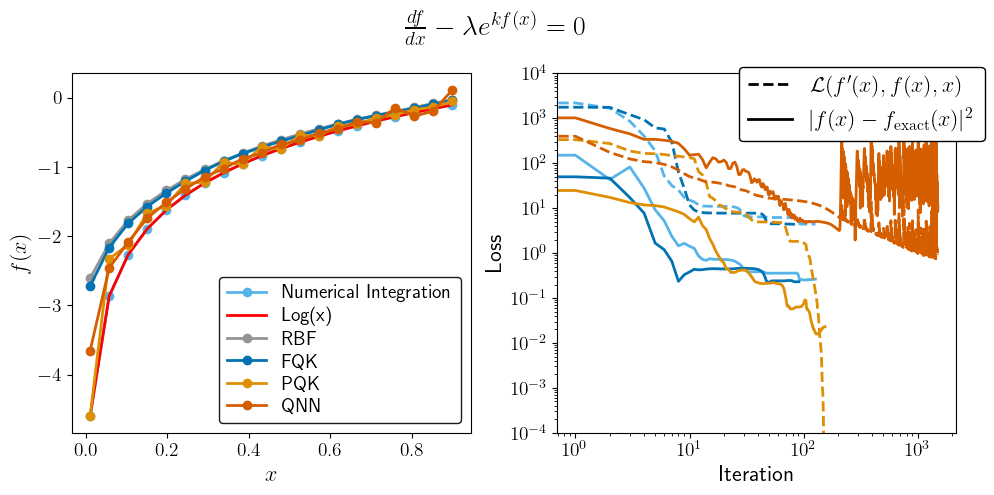

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

#cmap = get_cmap("tab10")  # or another colormap of your choice

cmap = ListedColormap(sns.color_palette("colorblind", 10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

x_span_plot = x_line
ax1.plot(x_span_plot, f_odeint, "-o", label="Numerical Integration", color=cmap.colors[9], linewidth=2)
ax1.plot(x_span_plot, np.log(x_span_plot), "-", label="Log(x)", color="red", linewidth=2)
ax1.plot(x_span_plot, results_classical["f_sol"][0], "-o", label="RBF", color=cmap.colors[7], linewidth=2)
ax1.plot(x_span_plot, results_FQK["f_sol"][0], "-o", label="FQK", color=cmap.colors[0], linewidth=2)
ax1.plot(x_span_plot, results_PQK["f_sol"][0], "-o", label="PQK", color=cmap.colors[1], linewidth=2)
ax1.plot(x_span_plot, results_QNN["f_sol"][0], "-o", label="QNN", color=cmap.colors[3], linewidth=2)

ax1.legend()

# dummy plot for legend
ax2.plot([10**-12, 1.2*10**-12 ], color="black", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot([10**-12, 1.2*10**-12 ], color="black", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)



ax2.plot(results_classical["loss_history"][0], color=cmap.colors[9], linestyle="--", linewidth=2)
ax2.plot(results_classical["mse_history"][0], color=cmap.colors[9],  linewidth=2)

#change legend color 

ax2.plot(results_FQK["loss_history"][0], color=cmap.colors[0], linestyle="--", linewidth=2)
ax2.plot(results_FQK["mse_history"][0], color=cmap.colors[0], linewidth=2)

ax2.plot(results_PQK["loss_history"][0], color=cmap.colors[1], linestyle="--", linewidth=2)
ax2.plot(results_PQK["mse_history"][0], color=cmap.colors[1], linewidth=2)



ax2.plot(results_QNN["loss_history"][0], color=cmap.colors[3], linestyle="--", linewidth=2)
ax2.plot(results_QNN["mse_history"][0], color=cmap.colors[3], linewidth=2)

ax1.legend(fontsize=14, loc="lower right", edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)

plt.suptitle(r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$", fontsize=20)

ax1.set_ylabel("$f(x)$", fontsize=16)
ax1.set_xlabel("$x$", fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.set_ylabel("Loss", fontsize=16)
ax2.set_xlabel("Iteration", fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax2.set_yscale("log")
ax2.set_xscale("log")

ax2.set_ylim(10**-4, 10**4)
plt.tight_layout()
plt.show()

fig.savefig("../plotting_notebooks/DE_log.png", bbox_inches='tight', dpi=400)


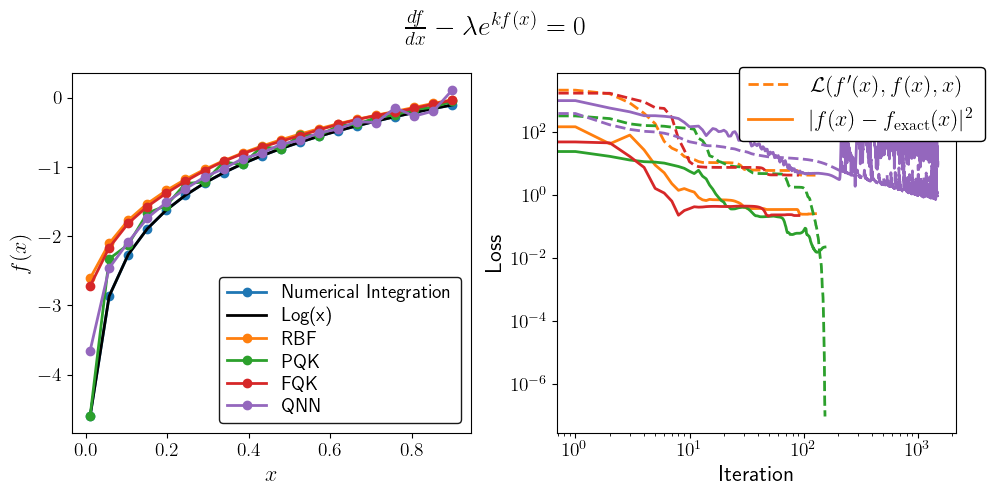

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


x_span_plot = x_line
ax1.plot(x_span_plot, f_odeint,"-o", label="Numerical Integration", color="C0", linewidth=2)
ax1.plot(x_span_plot, np.log(x_span_plot), "-", label="Log(x)", color="black", linewidth=2)
ax1.plot(x_span_plot, results_classical["f_sol"][0], "-o", label="RBF", color="C1", linewidth=2)
ax1.plot(x_span_plot, results_PQK["f_sol"][0], "-o", label="PQK", color="C2", linewidth=2)
ax1.plot(x_span_plot, results_FQK["f_sol"][0], "-o", label="FQK", color="C3", linewidth=2)
ax1.plot(x_span_plot, results_QNN["f_sol"][0], "-o", label="QNN", color="C4", linewidth=2)
#plt.ylim(-3, 3)


ax1.legend()


#ax2 is for the errors
ax2.plot(results_classical["loss_history"][0], color="C1", linestyle="--", label="$\mathcal{L}(f^\prime(x), f(x), x)$", linewidth=2)
ax2.plot(results_classical["mse_history"][0],  color="C1", label="$|f(x)-f_{\mathrm{exact}}(x)|^2$", linewidth=2)


ax2.plot(results_PQK["loss_history"][0], color="C2", linestyle="--", linewidth=2)
ax2.plot(results_PQK["mse_history"][0],  color="C2", linewidth=2)

ax2.plot(results_FQK["loss_history"][0], color="C3", linestyle="--", linewidth=2)
ax2.plot(results_FQK["mse_history"][0],  color="C3", linewidth=2)

ax2.plot(results_QNN["loss_history"][0], color="C4", linestyle="--", linewidth=2)
ax2.plot(results_QNN["mse_history"][0],  color="C4", linewidth=2)







ax1.legend(fontsize=14, loc="lower right", edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
ax2.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1.1, 1.05), edgecolor="black", fancybox=True, frameon=True, framealpha=1, labelspacing=0.5)


plt.suptitle(r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$", fontsize=20)	


ax1.set_ylabel("$f(x)$", fontsize = 16)
ax1.set_xlabel("$x$", fontsize = 16)
#change xlabel number size 
ax1.tick_params(axis='both', which='major', labelsize=14)


ax2.set_ylabel("Loss", fontsize = 16)
ax2.set_xlabel("Iteration", fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)


ax2.set_yscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.show()

fig.savefig("../plotting_notebooks/DE_log.png", bbox_inches='tight', dpi = 400)
